In [1]:
import pandas as pd 
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

### Convert the CSV file to the panda data frame

In [2]:
df = pd.read_csv('FinalBalancedDataset.csv')

### Accessing data within DF

In [3]:
print(df.columns)
print('')
print(df.head())

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

   Unnamed: 0  Toxicity                                              tweet
0           0         0   @user when a father is dysfunctional and is s...
1           1         0  @user @user thanks for #lyft credit i can't us...
2           2         0                                bihday your majesty
3           3         0  #model   i love u take with u all the time in ...
4           4         0             factsguide: society now    #motivation


### Dropping unwanted columns

In [5]:
# the axis=1 parameter specifies that you want to drop a column. In pandas, axis=0 refers to rows, while axis=1 refers to columns
df.drop('Unnamed: 0',axis=1,inplace=True)

### GENERATING WORD CLOUDs FOR ALL THE TOXIC WORDS AND ALL THE UNTOXIC WORDS

### 1. Prepare Your Data: Load your dataset containing text data, and filter out toxic and non-toxic words based on your classification.

### 2. Generate Word Clouds: Use WordCloud library to create word clouds for both sets of words.

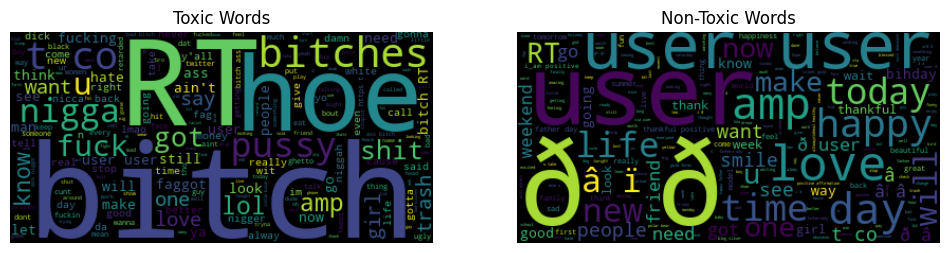

In [6]:
# This is to get a better understanding of the overall data
# getting a list of all the words in a toxic tweet and in a non-toxic tweet seperately
# Its labelled as Toxic - 1, Non toxic - 0.

# Join all toxic and non-toxic words
allToxicWords = ' '.join(df[df['Toxicity']== 1]['tweet'])
allNonToxicWords = ' '.join(df[df['Toxicity'] == 0]['tweet'])

# Generate word clouds
toxic_wordcloud = WordCloud().generate(allToxicWords)
non_toxic_wordcloud = WordCloud().generate(allNonToxicWords)

# Plot the word clouds
#Toxic Words
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Words')
plt.axis('off')

#Non-Toxic Words
plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Words')
plt.axis('off')

plt.show()

### DataFrame Contents of data

In [7]:
df.shape

(56745, 2)

## Importing NLTK 

#### the 'punkt' tokenizer models from NLTK. This tokenizer is used for tokenizing text into individual words or tokens. 
#### After running this command, NLTK will store the 'punkt' models on your system, which will enable you to use NLTK's tokenization capabilities.

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Stopwords are common words such as "the", "is", "in", etc., that are often removed from text because they typically do not carry significant meaning for analysis

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### WordNet is a lexical database of English words and their semantic relationships, such as synonyms, hypernyms, hyponyms, and more.

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [12]:
## defining a function to clean the data which we will pass through as tweets

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to form cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['cleaned_tweet'] = df['tweet'].apply(clean_text)

In [13]:
#df after removing stop words, Tokenize, lemmatization and removing punctuations
df['cleaned_tweet']

0        user father dysfunctional selfish drag kid dys...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
56740    yous muthafin lie lifeasking pearl coreyemanue...
56741    youve gone broke wrong heart baby drove rednec...
56742    young buck wan na eat dat nigguh like aint fuc...
56743                       youu got wild bitch tellin lie
56744    ruffled ntac eileen dahlia beautiful color com...
Name: cleaned_tweet, Length: 56745, dtype: object

## making a similar word cloud after text cleaning to notice any differences

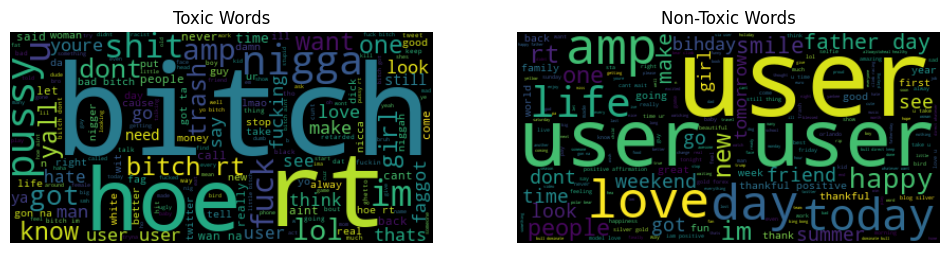

In [14]:
toxic_words = ' '.join(df[df['Toxicity'] == 1]['cleaned_tweet'])
non_toxic_words = ' '.join(df[df['Toxicity'] == 0]['cleaned_tweet'])

toxic_wordcloud = WordCloud().generate(toxic_words)
non_toxic_wordcloud = WordCloud().generate(non_toxic_words)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Words')
plt.axis('off')

plt.show()

In [15]:
df.shape

(56745, 3)

#### splitting the data

In [16]:
# train_test_split function from the scikit-learn library to split the data into training and testing sets.

X_train,X_test,y_train,y_test=train_test_split(df['cleaned_tweet'][:25000],df['Toxicity'][:25000],random_state=42,train_size=0.8)

##### df['cleaned_tweet'][:25000]: This selects the first 25,000 rows from the 'cleaned_tweet' column of the DataFrame df. These are the features (X) that will be used for training and testing.

##### df['Toxicity'][:25000]: This selects the first 25,000 rows from the 'Toxicity' column of the DataFrame df. These are the labels (y) corresponding to the features.

##### random_state=42: This parameter sets the random seed for reproducibility. It ensures that the split will be the same every time you run the code with the same random_state value. This is useful for reproducible results.

##### train_size=0.8: This parameter specifies the proportion of the dataset to include in the training split. Here, it's set to 0.8, meaning 80% of the data will be used for training and 20% for testing.

##### X_train, X_test, y_train, y_test: These variables store the resulting splits. X_train contains the features for training, X_test contains the features for testing, y_train contains the corresponding labels for training, and y_test contains the corresponding labels for testing.

##### So, after executing this line of code, you'll have four sets of data:

##### X_train: The features for training the model (80% of the cleaned tweets).
##### X_test: The features for testing the model (20% of the cleaned tweets).
##### y_train: The corresponding labels for training (80% of the toxicity labels).
##### y_test: The corresponding labels for testing (20% of the toxicity labels).
##### These sets are split randomly but with reproducibility due to the specified random seed. They're now ready to be used for training and evaluating machine learning models

In [17]:
X_train.shape

(20000,)

### Convert the text to the following.
##### • Bag of Words
##### • TF-IDF

In [18]:
# Bag-of-Words (BoW) Vectorization:
bow_vectorizer = CountVectorizer() #creates a matrix where each row represents a document (tweet) and each column represents a unique word in the corpus.
X_train_bow = bow_vectorizer.fit_transform(X_train) # fits the vectorizer to the training data (X_train) and transforms it into a BoW representation.
X_test_bow = bow_vectorizer.transform(X_test) # transforms the test data (X_test) into BoW representation using the same vocabulary learned from the training data.

# TF-IDF Vectorization:
tfidf_vectorizer = TfidfVectorizer() # creates a matrix where each row represents a document (tweet) and each column represents a unique word in the corpus
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) # fits the vectorizer to the training data (X_train) and transforms it into a TF-IDF representation.
X_test_tfidf = tfidf_vectorizer.transform(X_test) # transforms the test data (X_test) into TF-IDF representation using the same vocabulary learned from the training data.

#X_train_bow and X_test_bow will contain the BoW representations of the training and test data, respectively.
#X_train_tfidf and X_test_tfidf will contain the TF-IDF representations of the training and test data, respectively.

In [19]:
def generate_metrics(y_true, y_pred_probs, model_name):
    y_pred = (y_pred_probs >= 0.5).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_probs)
    print(f"{model_name} Metrics:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")
    return precision, recall, f1, roc_auc #It returns the computed metrics as a tuple.

# Train and predict for Bag of Words and TF-IDF
metrics_list = []
def model_specific_metrics(model_name,model):
    # Bag of Words
    model.fit(X_train_bow, y_train)
    predictions_bow = model.predict_proba(X_test_bow)[:, 1]
    # calls generate_metrics to compute evaluation metrics, and appends the metrics to a list.
    precision_bow, recall_bow, f1_bow, roc_auc_bow = generate_metrics(y_test, predictions_bow, model_name + ' (Bag of Words)')
    metrics_list.append((model_name + ' (Bag of Words)', precision_bow, recall_bow, f1_bow, roc_auc_bow))

    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    predictions_tfidf = model.predict_proba(X_test_tfidf)[:, 1]
    # calls generate_metrics to compute evaluation metrics, and appends the metrics to a list.
    precision_tfidf, recall_tfidf, f1_tfidf, roc_auc_tfidf = generate_metrics(y_test, predictions_tfidf, model_name + ' (TF-IDF)')
    metrics_list.append((model_name + ' (TF-IDF)', precision_tfidf, recall_tfidf, f1_tfidf, roc_auc_tfidf))


### Decision Tree

In [20]:
dt=DecisionTreeClassifier()
model_specific_metrics('Decision Tree',dt)

Decision Tree (Bag of Words) Metrics:
Precision: 0.60, Recall: 0.56, F1-score: 0.58, ROC-AUC: 0.78
Decision Tree (TF-IDF) Metrics:
Precision: 0.57, Recall: 0.56, F1-score: 0.56, ROC-AUC: 0.76


### Random Forest

In [21]:
rf=RandomForestClassifier()
model_specific_metrics('Random Forest',rf)

Random Forest (Bag of Words) Metrics:
Precision: 0.84, Recall: 0.49, F1-score: 0.62, ROC-AUC: 0.94
Random Forest (TF-IDF) Metrics:
Precision: 0.88, Recall: 0.48, F1-score: 0.62, ROC-AUC: 0.95


### Naive Bayes

In [22]:
nb=MultinomialNB()
model_specific_metrics("Naive Bayes",nb)

Naive Bayes (Bag of Words) Metrics:
Precision: 0.83, Recall: 0.47, F1-score: 0.60, ROC-AUC: 0.93
Naive Bayes (TF-IDF) Metrics:
Precision: 1.00, Recall: 0.14, F1-score: 0.24, ROC-AUC: 0.91


### KNN

In [23]:
knn=KNeighborsClassifier()
model_specific_metrics("KNeighborsClassifier",knn)

KNeighborsClassifier (Bag of Words) Metrics:
Precision: 0.95, Recall: 0.17, F1-score: 0.28, ROC-AUC: 0.73
KNeighborsClassifier (TF-IDF) Metrics:
Precision: 0.98, Recall: 0.17, F1-score: 0.29, ROC-AUC: 0.67


### SVM

In [24]:
svm=SVC(probability=True)
model_specific_metrics("SVM",svm)

SVM (Bag of Words) Metrics:
Precision: 0.75, Recall: 0.58, F1-score: 0.65, ROC-AUC: 0.95
SVM (TF-IDF) Metrics:
Precision: 0.75, Recall: 0.62, F1-score: 0.68, ROC-AUC: 0.96


In [25]:
metrics_list

[('Decision Tree (Bag of Words)',
  0.6013071895424836,
  0.5592705167173252,
  0.5795275590551181,
  0.7750486575969296),
 ('Decision Tree (TF-IDF)',
  0.571875,
  0.5562310030395137,
  0.5639445300462249,
  0.763070526998703),
 ('Random Forest (Bag of Words)',
  0.8350515463917526,
  0.49240121580547114,
  0.6195028680688337,
  0.9424558437594964),
 ('Random Forest (TF-IDF)',
  0.8784530386740331,
  0.48328267477203646,
  0.6235294117647059,
  0.9455806017729521),
 ('Naive Bayes (Bag of Words)',
  0.8342245989304813,
  0.47416413373860183,
  0.6046511627906976,
  0.9261409889253942),
 ('Naive Bayes (TF-IDF)',
  1.0,
  0.13677811550151975,
  0.24064171122994651,
  0.9126525369299936),
 ('KNeighborsClassifier (Bag of Words)',
  0.9482758620689655,
  0.16717325227963525,
  0.2842377260981912,
  0.7268452633106428),
 ('KNeighborsClassifier (TF-IDF)',
  0.9821428571428571,
  0.16717325227963525,
  0.2857142857142857,
  0.6694299496537844),
 ('SVM (Bag of Words)',
  0.7480314960629921,
  0

## Generating a metric dataset for easy plotting and comparison for each model

In [26]:
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
metrics_df['Vectorization'] = ['Bag of Words' if 'Bag of Words' in model else 'TF-IDF' for model in metrics_df['Model']]

In [27]:
## function to plot bar graphs
def generate_bar_chart(metrics_list, metric_name):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric_name, hue='Vectorization', data=metrics_list)
    plt.xticks(rotation=45)
    plt.title(f'{metric_name} for Different Models')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.savefig(f'{metric_name.lower()}_bar_chart.pdf')
    plt.show()
    plt.close()

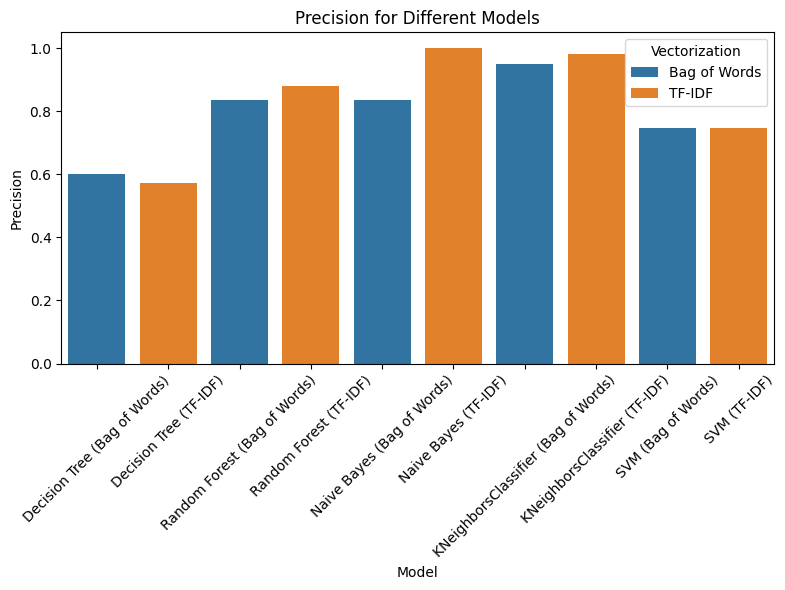

In [28]:
## to generate the precision graph for a comparison
generate_bar_chart(metrics_df, 'Precision')

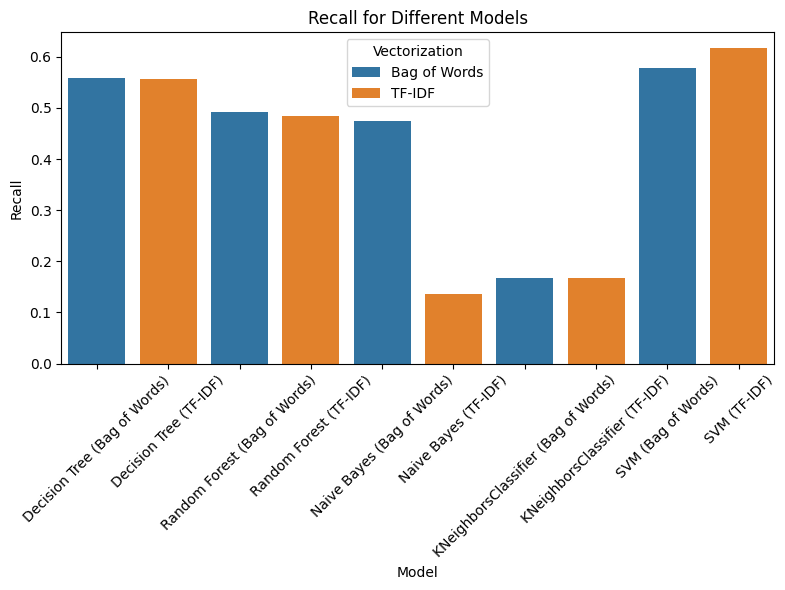

In [29]:
## to generate a recall graph for comparison amonf the model
generate_bar_chart(metrics_df, 'Recall')

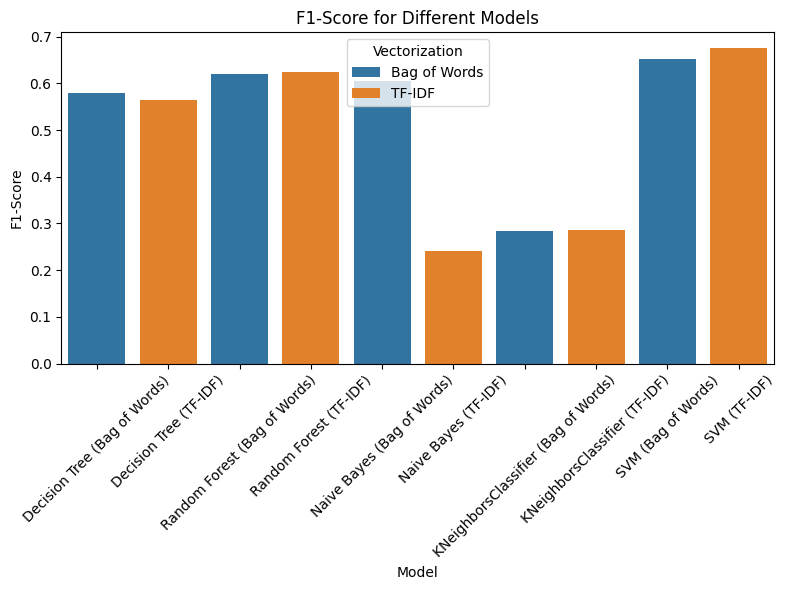

In [30]:
## to generate a f1-score graph for comparison among the models
generate_bar_chart(metrics_df, 'F1-Score')

In [31]:
def generate_confusion_matrix_and_roc_curve(y_true, y_pred_probs, model_name):
    y_pred = (y_pred_probs >= 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    #confusion matrix using sns.heatmap from Seaborn.
    #It saves the plot as a PDF file.
    #It displays the plot.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'{model_name.lower()}_confusion_matrix.pdf')
    plt.show()
    plt.close()

    roc_auc = roc_auc_score(y_true, y_pred_probs)
    # false positive rate (FPR) and true positive rate (TPR) using roc_curve from scikit-learn.
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    plt.figure(figsize=(10, 6))
    #It plots the ROC curve using plt.plot.
    #It saves the plot as a PDF file.
    #It displays the plot.
    plt.plot(fpr, tpr, label=f'{model_name}, ROC-AUC: {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{model_name.lower()}_roc_curve.pdf')
    plt.show()
    plt.close()

In [32]:
#plotRocAuc is designed to plot the ROC curve and display the confusion matrix for a given model 
#using both Bag-of-Words (BoW) and TF-IDF representations of the data
def plotRocAuc(model_name,model):
    # Bag of Words
    model.fit(X_train_bow, y_train)
    generate_confusion_matrix_and_roc_curve(y_test, model.predict_proba(X_test_bow)[:, 1], model_name + ' (Bag of Words)')

    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    generate_confusion_matrix_and_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], model_name + ' (TF-IDF)')

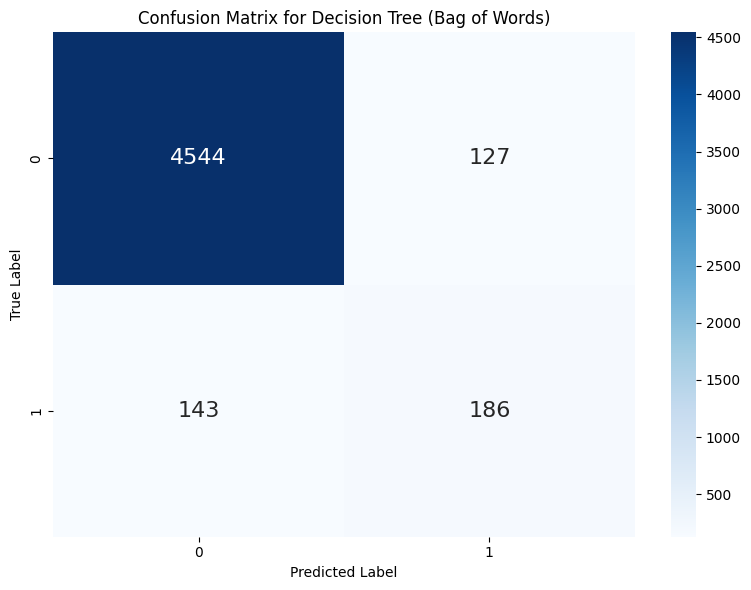

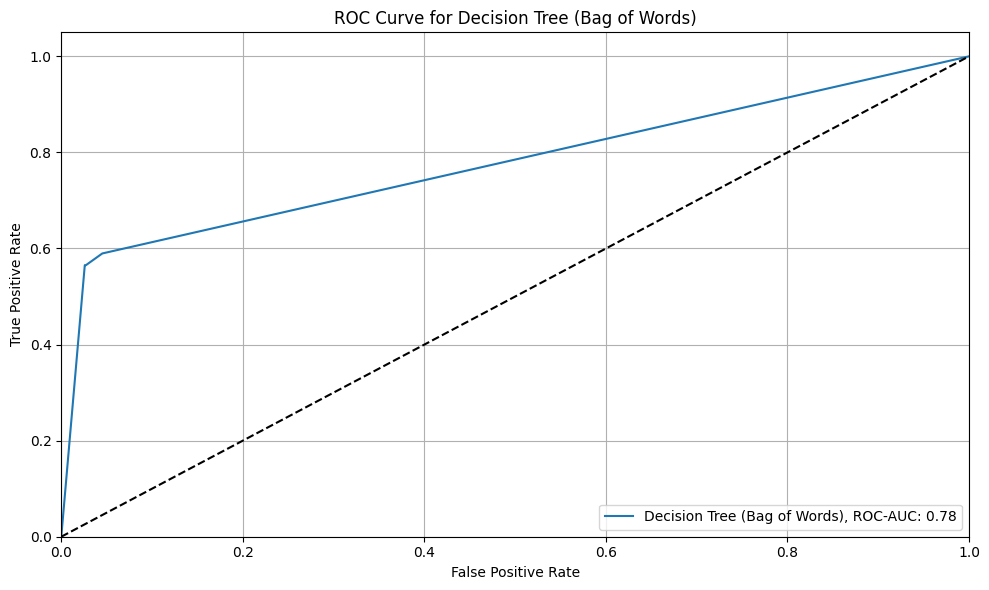

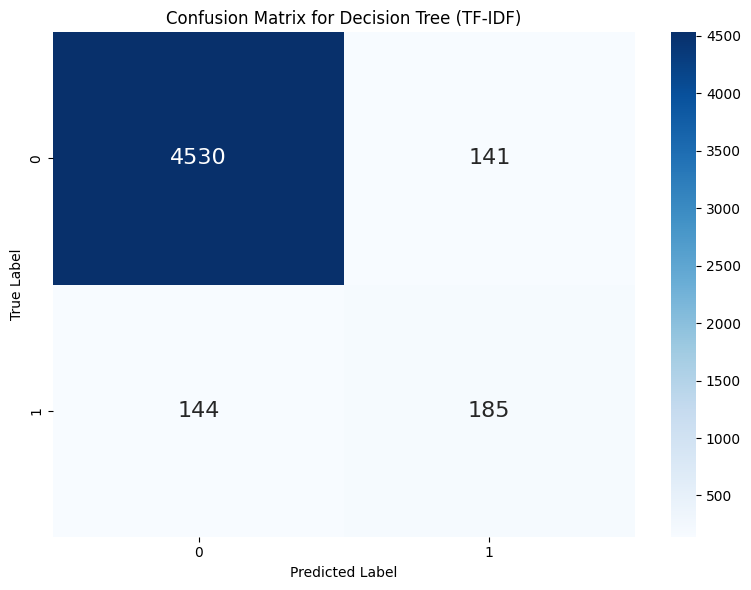

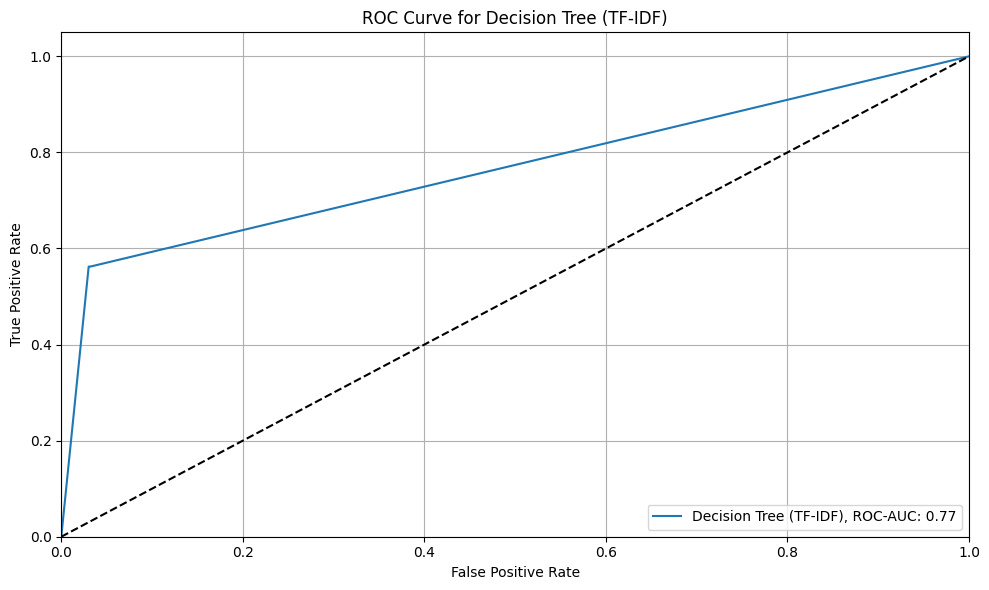

In [33]:
## for decision tree
plotRocAuc("Decision Tree",dt)

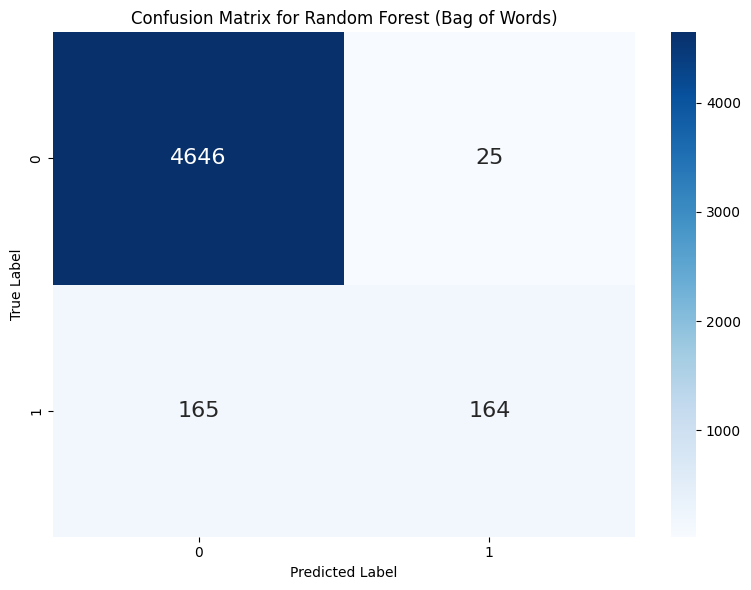

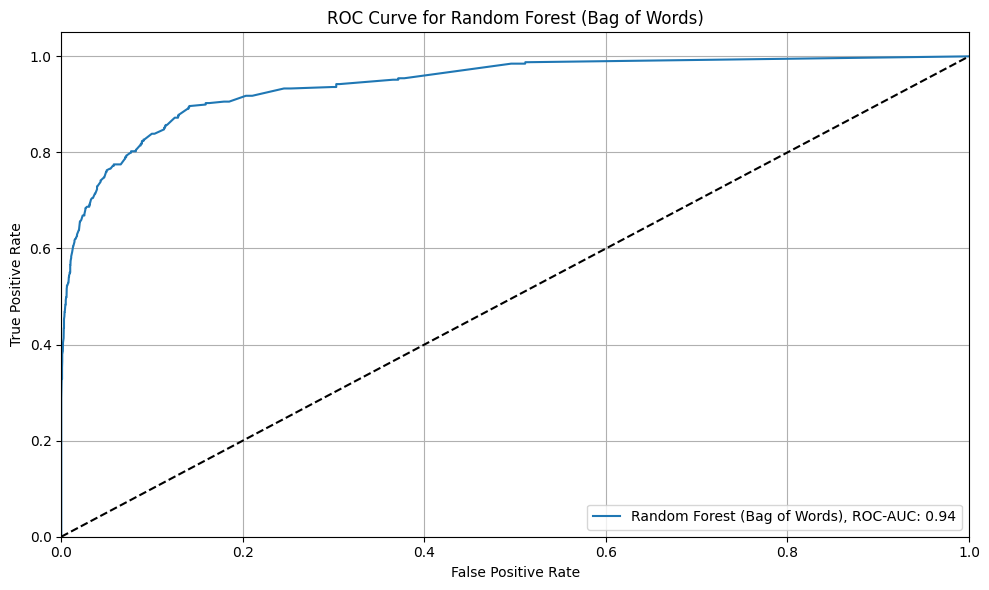

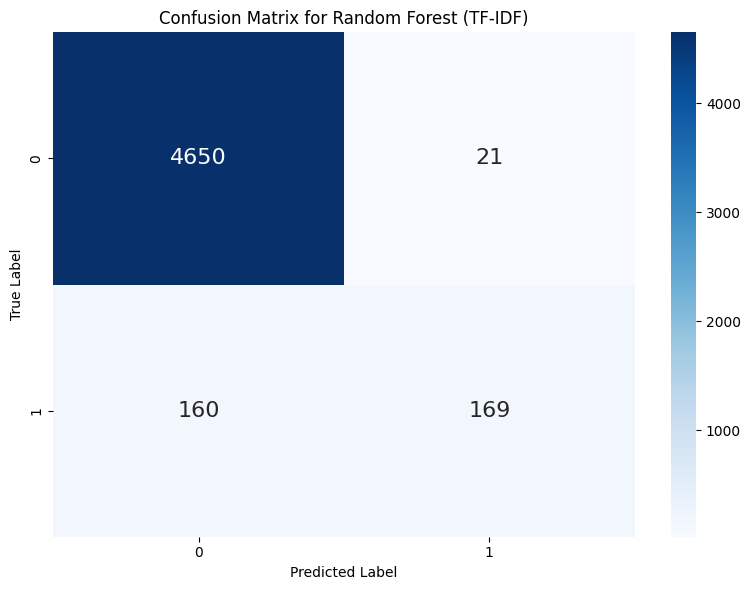

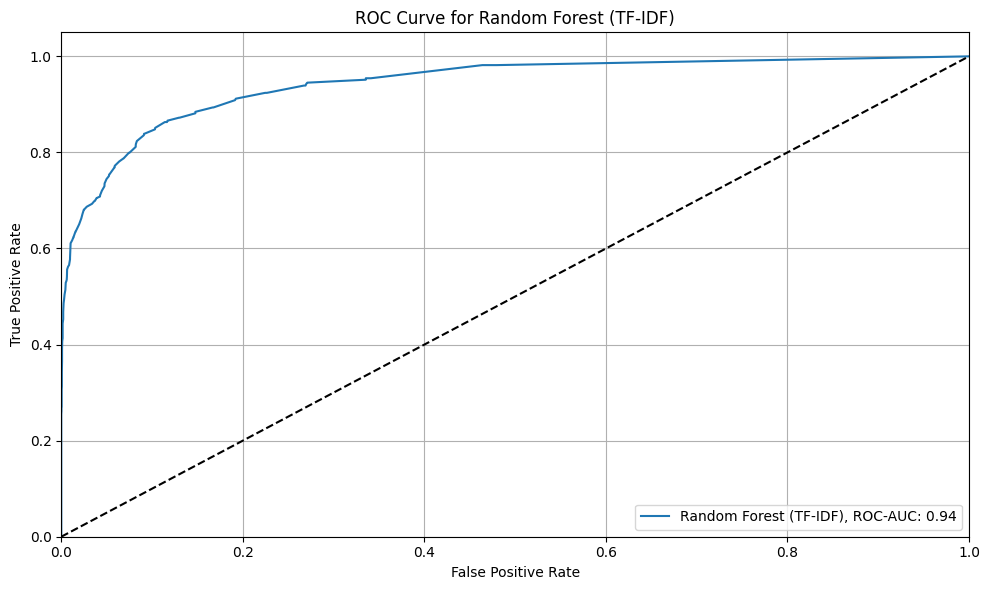

In [34]:
## for random forest
plotRocAuc("Random Forest",rf)

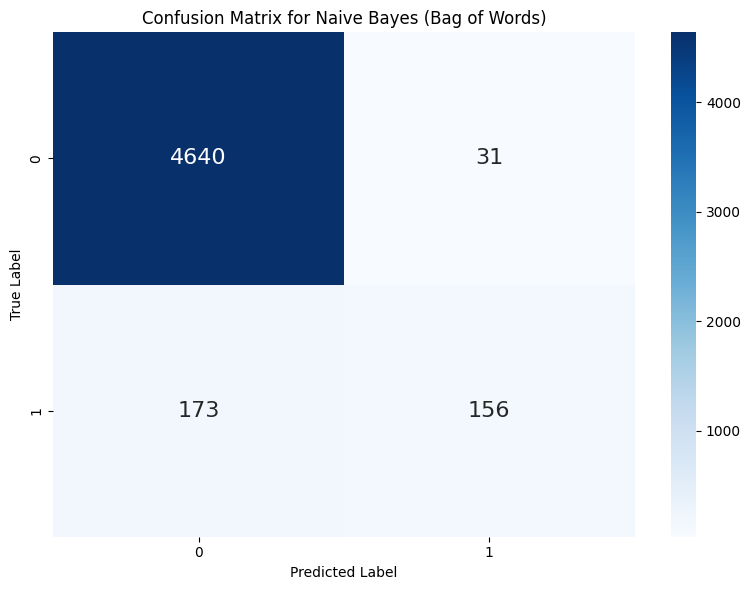

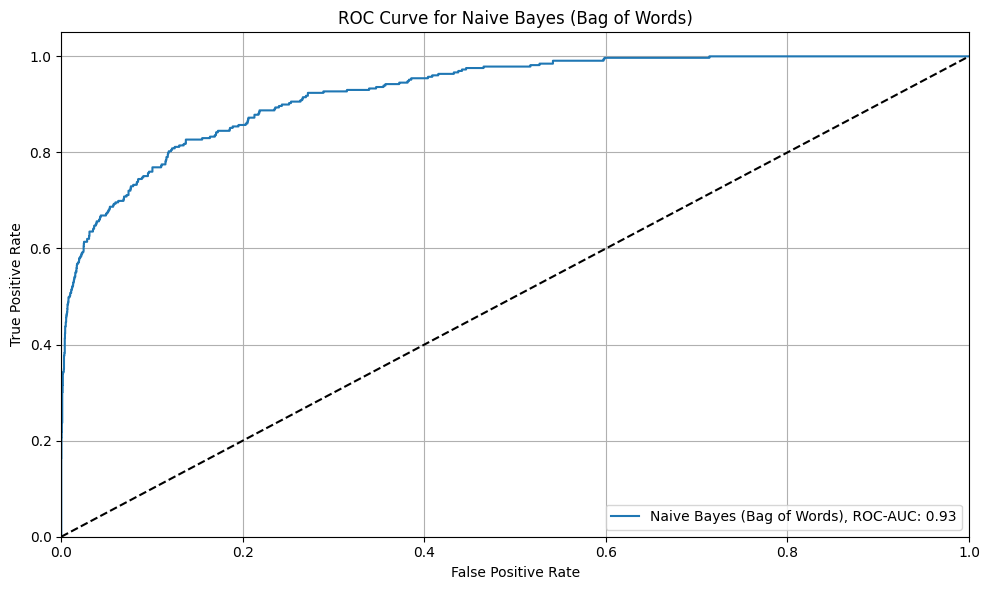

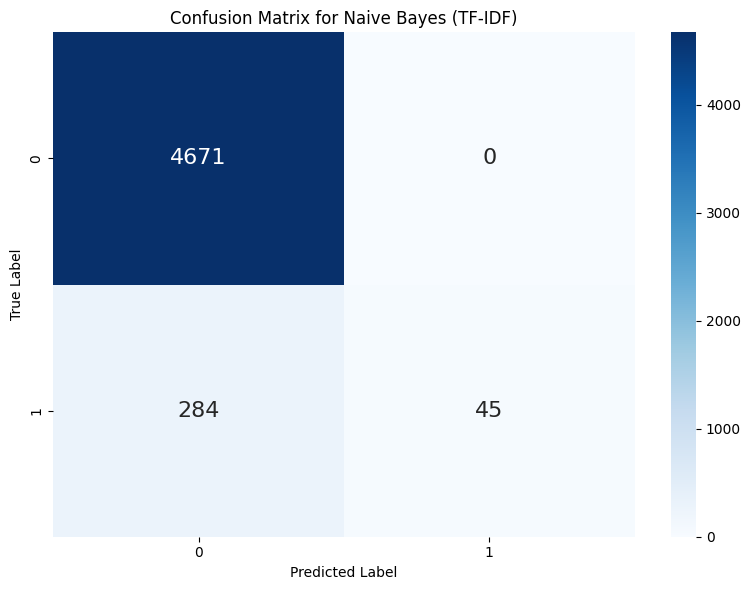

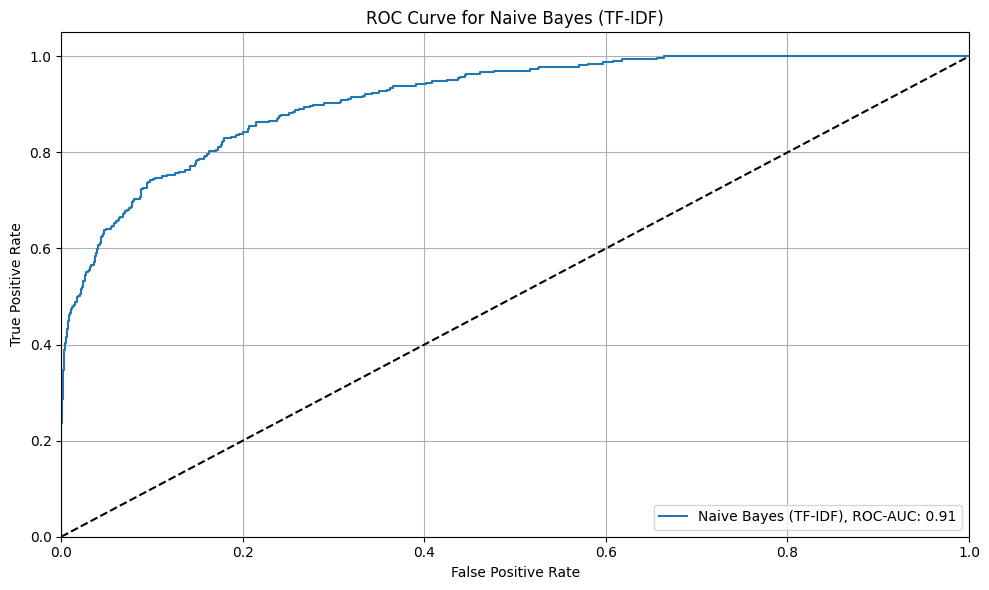

In [35]:
## for Naive Bayes
plotRocAuc("Naive Bayes",nb)

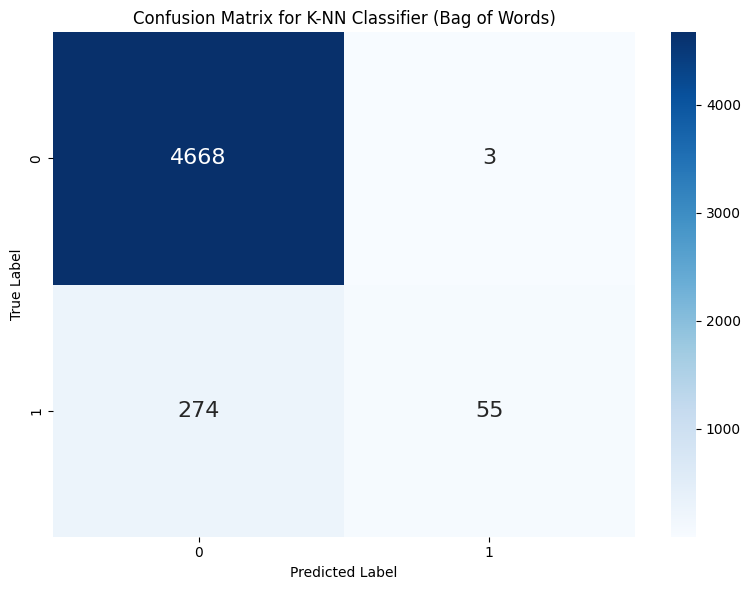

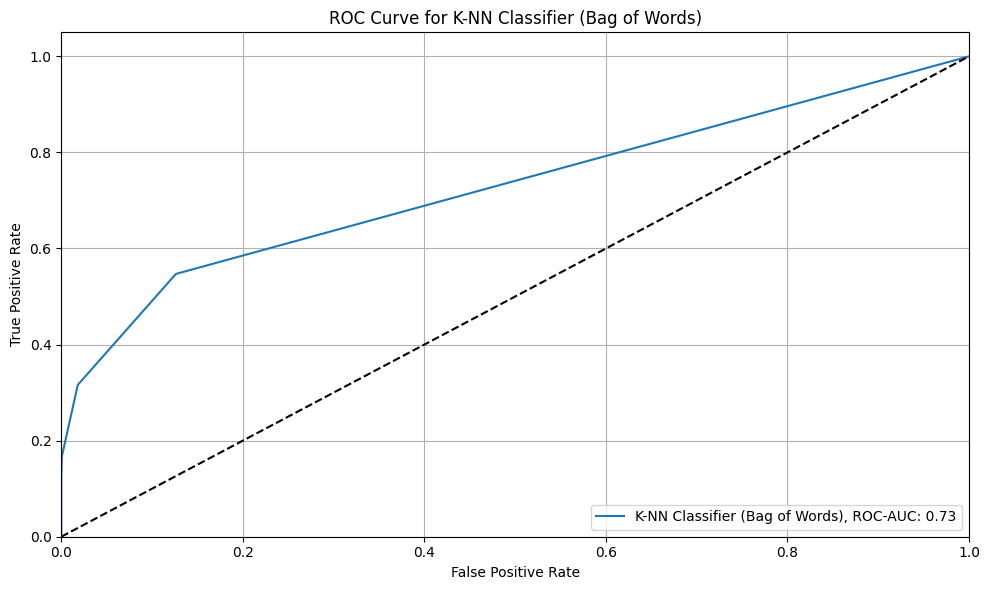

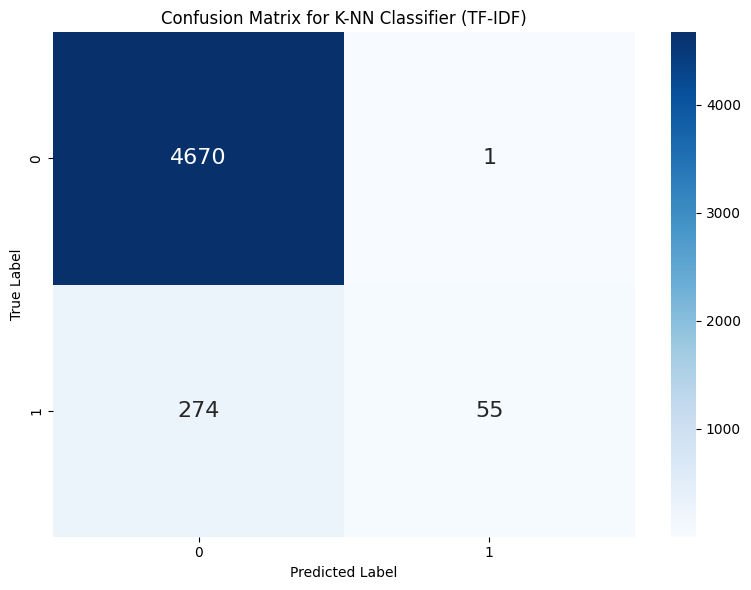

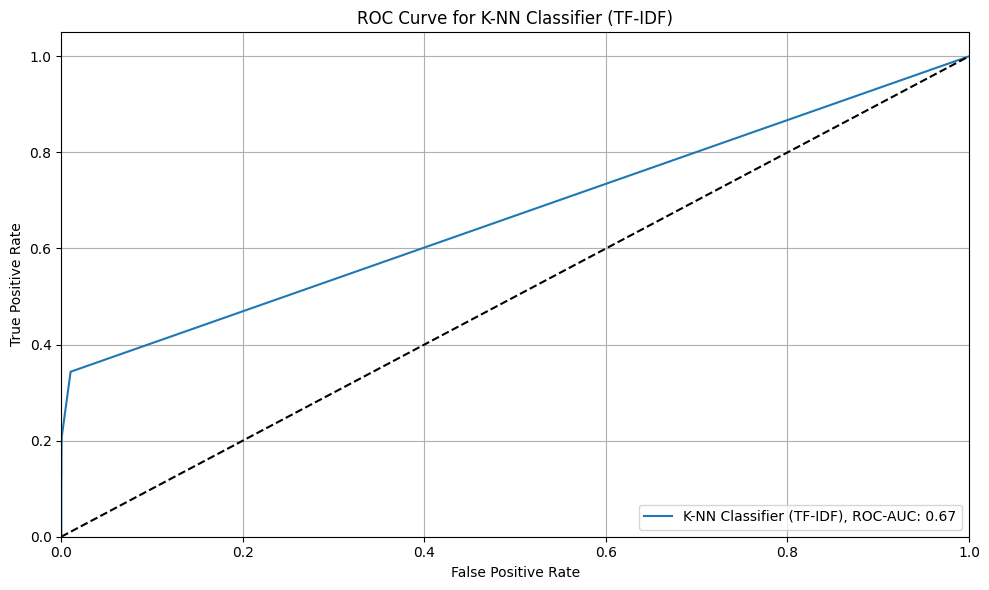

In [36]:
#KNN Classifier
plotRocAuc("K-NN Classifier",knn)

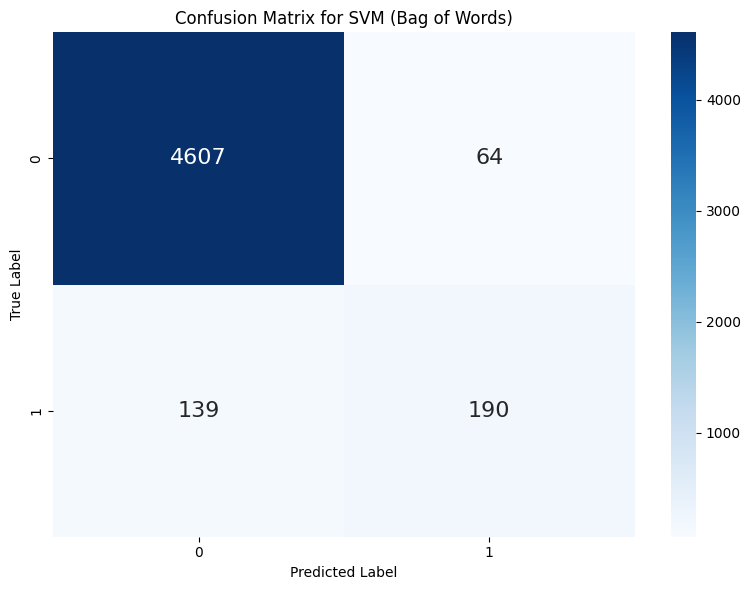

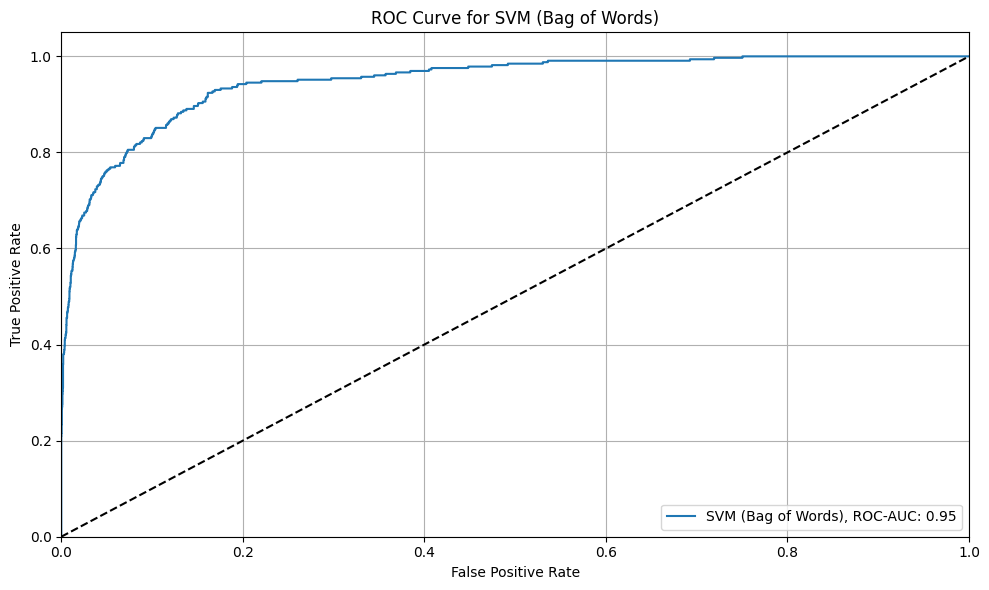

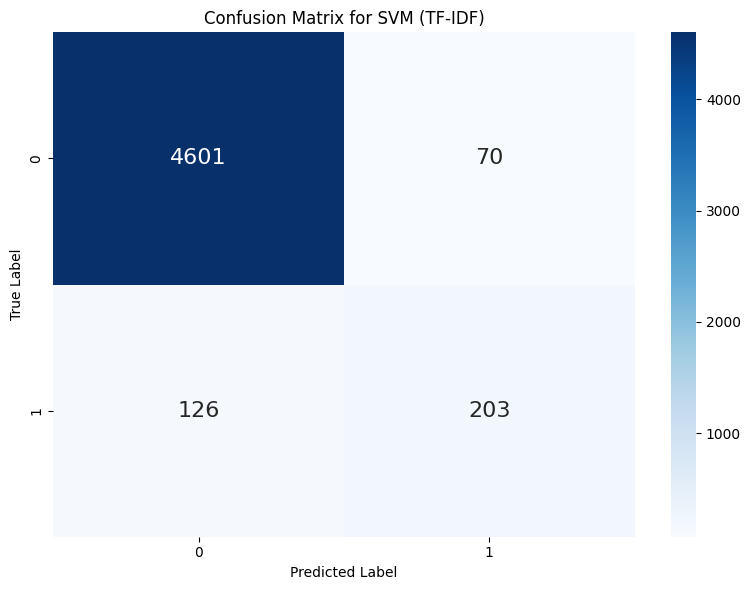

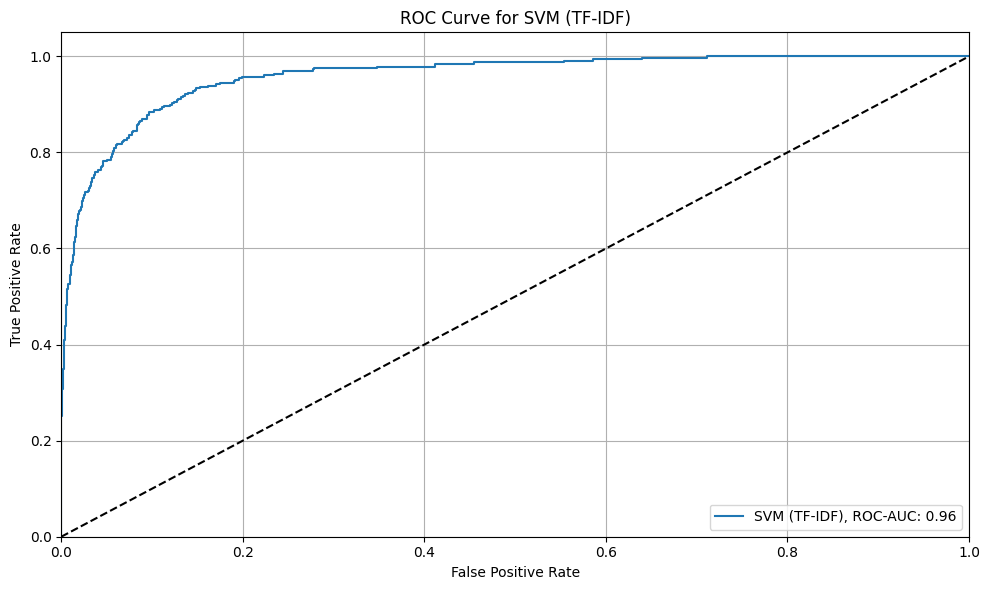

In [37]:
#SVM
svm=SVC(probability=True)
plotRocAuc("SVM",svm)